In [1]:
# Import libraries
import numpy as np
import pandas as pd

from pytrack.graph import graph, distance
from pytrack.analytics import plot
from pytrack.matching import candidate, mpmatching_utils, mpmatching

In [2]:
df = pd.read_excel("dataset.xlsx")

latitude = df["latitude"].to_list()
longitude = df["longitude"].to_list()

points = [(lat, lon) for lat, lon in zip(latitude[:30], longitude[:30])]

In [3]:
# Create BBOX
north, east = np.max(np.array([*points]), 0)
south, west = np.min(np.array([*points]), 0)

# Extract road graph
G = graph.graph_from_bbox(*distance.enlarge_bbox(north, south, west, east, 500), simplify=True, network_type='drive')

Downloaded 446.89kB


In [4]:
# Initialize maps
loc = (np.mean(latitude[:30]), np.mean(longitude[:30]))
maps = plot.Map(location=loc, zoom_start=15)

In [5]:
# Show extracted graph
maps.add_graph(G, plot_nodes=True)
maps

In [6]:
# Extract candidates
G_interp, results = candidate.get_candidates(G, points, interp_dist=5, closest=True, radius=30)

# Plot results
maps.draw_candidates(results, 30)
maps

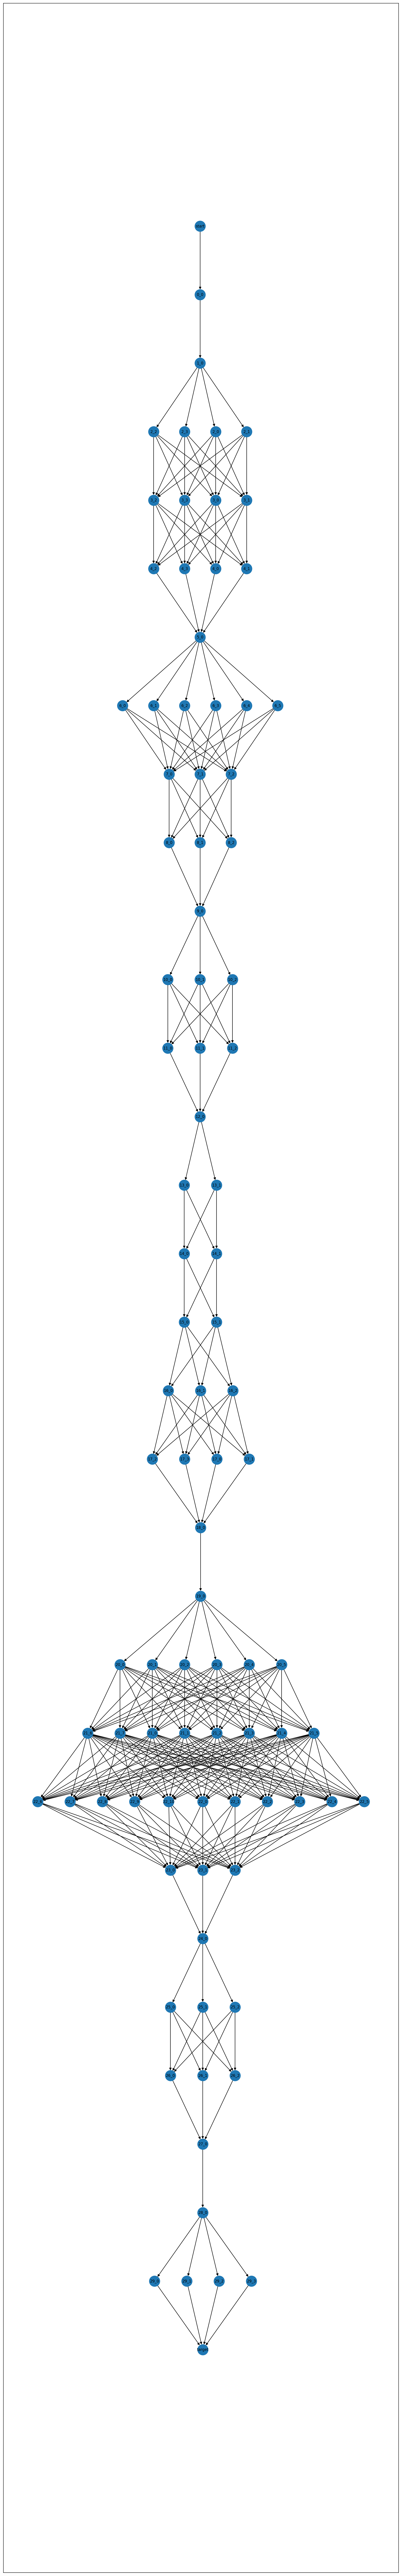

In [7]:
# Extract trellis DAG graph
trellis = mpmatching_utils.create_trellis(results)

# Plot trellis graph
trellis_draw = plot.draw_trellis(trellis, figsize=(15, 100), dpi=200)
trellis_draw

In [8]:
path_prob, predecessor = mpmatching.viterbi_search(G_interp, trellis, "start", "target")

In [9]:
# Plot map-matching results
results_elab = candidate.elab_candidate_results(results, predecessor)
maps.draw_path(G_interp, trellis, predecessor)
maps